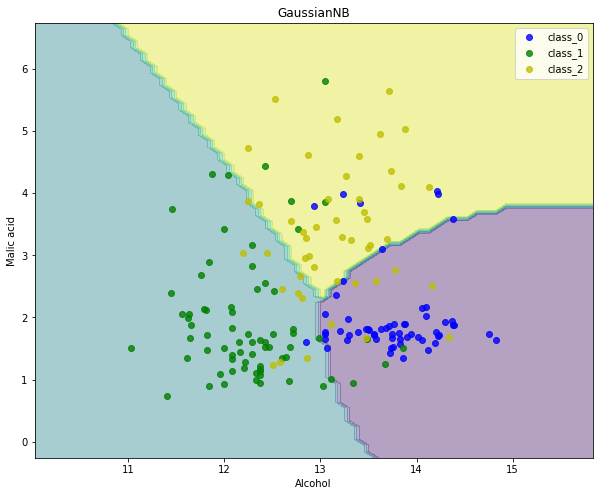

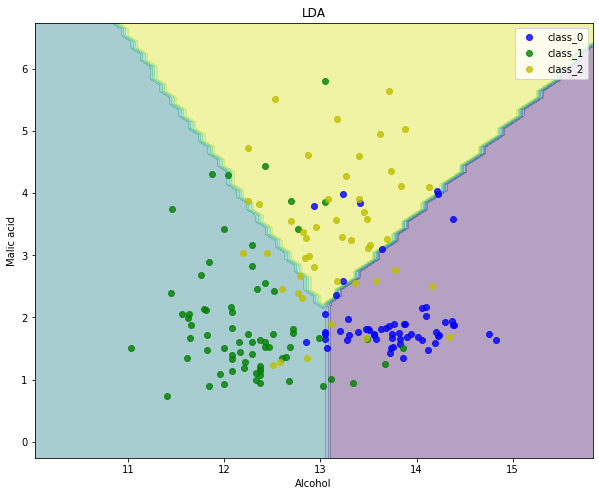

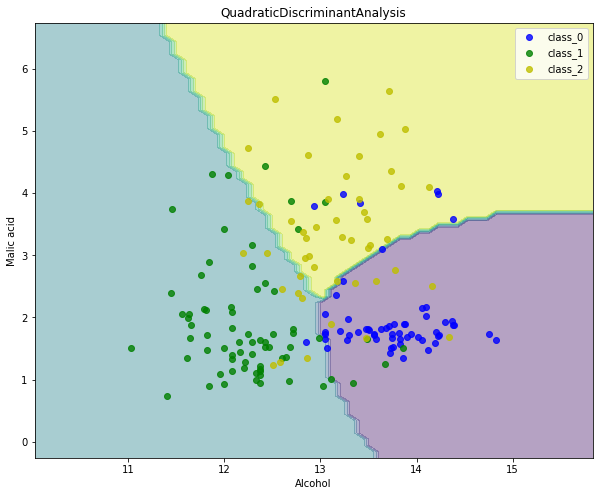

In [11]:
#Import Library of Gaussian Naive Bayes model
from itertools import product
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import numpy as np

#assigning predictor and target variables
wine = datasets.load_wine()
X = wine.data[:, :2]
y = wine.target
#Create a Gaussian Classifier

clf1 = GaussianNB()
clf2 =  LDA(n_components=2)
clf3 = QuadraticDiscriminantAnalysis()

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))



for  clf, tt in zip(
                        [clf1, clf2, clf3 ],
                        ['GaussianNB', 'LDA',
                         'QuadraticDiscriminantAnalysis']):
    plt.subplots( figsize=(10, 8))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    for color, i ,  target_name in zip(colors,[0, 1, 2], target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], alpha=.8, color=color,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)


    plt.xlabel('Alcohol')
    plt.ylabel('Malic acid')
    plt.title(tt)
    plt.show()